In [1]:
#Importing requrired libraries

import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
import warnings; 
warnings.simplefilter('ignore')


In [2]:
#Read csv file
data = pd.read_csv(r"F:\vinit.rege\new.csv", header=0,encoding = 'unicode_escape')

In [3]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,Û226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,Û127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,Û228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,Û138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,Û196.4M


In [4]:
data.describe(include = 'all')

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
count,18207.000000,18207.000000,18207,18207.000000,18207,18207,18207,18207.000000,18207.000000,17966,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,16643
unique,NaN,NaN,17194,NaN,18207,164,164,NaN,NaN,651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1244
top,NaN,NaN,J. Rodrguez,NaN,https://cdn.sofifa.org/players/4/19/225072.png,England,https://cdn.sofifa.org/flags/14.png,NaN,NaN,AS Monaco,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Û1.1M
freq,NaN,NaN,11,NaN,1,1662,1662,NaN,NaN,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,557
mean,9103.000000,214298.338606,NaN,25.122206,NaN,NaN,NaN,66.238699,71.307299,NaN,...,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,NaN
std,5256.052511,29965.244204,NaN,4.669943,NaN,NaN,NaN,6.908930,6.136496,NaN,...,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,NaN
min,0.000000,16.000000,NaN,16.000000,NaN,NaN,NaN,46.000000,48.000000,NaN,...,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,4551.500000,200315.500000,NaN,21.000000,NaN,NaN,NaN,62.000000,67.000000,NaN,...,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,NaN
50%,9103.000000,221759.000000,NaN,25.000000,NaN,NaN,NaN,66.000000,71.000000,NaN,...,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,NaN
75%,13654.500000,236529.500000,NaN,28.000000,NaN,NaN,NaN,71.000000,75.000000,NaN,...,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,NaN


In [5]:
#Delition of unwanted columns


data=data.drop(columns=["ID","Photo","Flag","Club Logo","Value","Wage","Special",
                        "Skill Moves","Body Type","Real Face","Jersey Number",
                        "Joined","Loaned From","Contract Valid Until","Height","Weight",
                        "Release Clause"],axis=1)

In [6]:
data1 = data

In [7]:
#Finding columns who has null values

null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

Club                         241
Preferred Foot                48
International Reputation      48
WeakFoot                      48
Work Rate                     48
Position                      60
LS                          2085
ST                          2085
RS                          2085
LW                          2085
LF                          2085
CF                          2085
RF                          2085
RW                          2085
LAM                         2085
CAM                         2085
RAM                         2085
LM                          2085
LCM                         2085
CM                          2085
RCM                         2085
RM                          2085
LWB                         2085
LDM                         2085
CDM                         2085
RDM                         2085
RWB                         2085
LB                          2085
LCB                         2085
CB                          2085
          

In [8]:
#Removing records with null values
data = data.dropna(subset=['Club',"Age", 'Preferred Foot', 'International Reputation', 'Work Rate', 'Position', 'LS', 'ST', 
                           'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 
                           'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'Acceleration',
                           'ShortPassing', 'Volleys', 'Dribbling', 'Curve','FKAccuracy','LongPassing', 'BallControl','Strength',
                           'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Aggression', 
                           'LongShots', 'HeadingAccuracy', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                            'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling','GKKicking', 'GKPositioning',
                           'GKReflexes'])

In [9]:
# Cleaaning some columns who has complex data

def Clean_numbers(numbers):
    
    if re.search('\D[0-9]', numbers):
        
        pos = re.search('\D[0-9]', numbers).start()
        return numbers[:pos]
    else:
        
        return numbers
    
    

data['LS'] = data['LS'].apply(Clean_numbers) 
data['RAM'] = data['RAM'].apply(Clean_numbers) 
data['ST'] = data['ST'].apply(Clean_numbers) 
data['RS'] = data['RS'].apply(Clean_numbers) 
data['LW'] = data['LW'].apply(Clean_numbers) 
data['LF'] = data['LF'].apply(Clean_numbers) 
data['CF'] = data['CF'].apply(Clean_numbers) 
data['RF'] = data['RF'].apply(Clean_numbers) 
data['RW'] = data['RW'].apply(Clean_numbers) 
data['LAM'] = data['LAM'].apply(Clean_numbers) 
data['CAM'] = data['CAM'].apply(Clean_numbers) 
data['LM'] = data['LM'].apply(Clean_numbers) 
data['LCM'] = data['LCM'].apply(Clean_numbers) 
data['CM'] = data['CM'].apply(Clean_numbers) 
data['RCM'] = data['RCM'].apply(Clean_numbers) 
data['RM'] = data['RM'].apply(Clean_numbers) 
data['LWB'] = data['LWB'].apply(Clean_numbers) 
data['LDM'] = data['LDM'].apply(Clean_numbers) 
data['CDM'] = data['CDM'].apply(Clean_numbers) 
data['RDM'] = data['RDM'].apply(Clean_numbers) 
data['RWB'] = data['RWB'].apply(Clean_numbers) 
data['LB'] = data['LB'].apply(Clean_numbers) 
data['LCB'] = data['LCB'].apply(Clean_numbers) 
data['CB'] = data['CB'].apply(Clean_numbers) 
data['RCB'] = data['RCB'].apply(Clean_numbers) 
data['RB'] = data['RB'].apply(Clean_numbers)


for col in ['LS', 'RAM', 'ST', 'RS','LW','LF','CF','RF', 'RW','LAM', 'CAM', 'LM', 'LCM', 'CM', 'RCM','RM', 'LWB','LDM', 'CDM',
            'RDM', 'RWB', 'LB', 'LCB', 'CB','RCB', 'RB']:
    data[col] = data[col].astype('float')


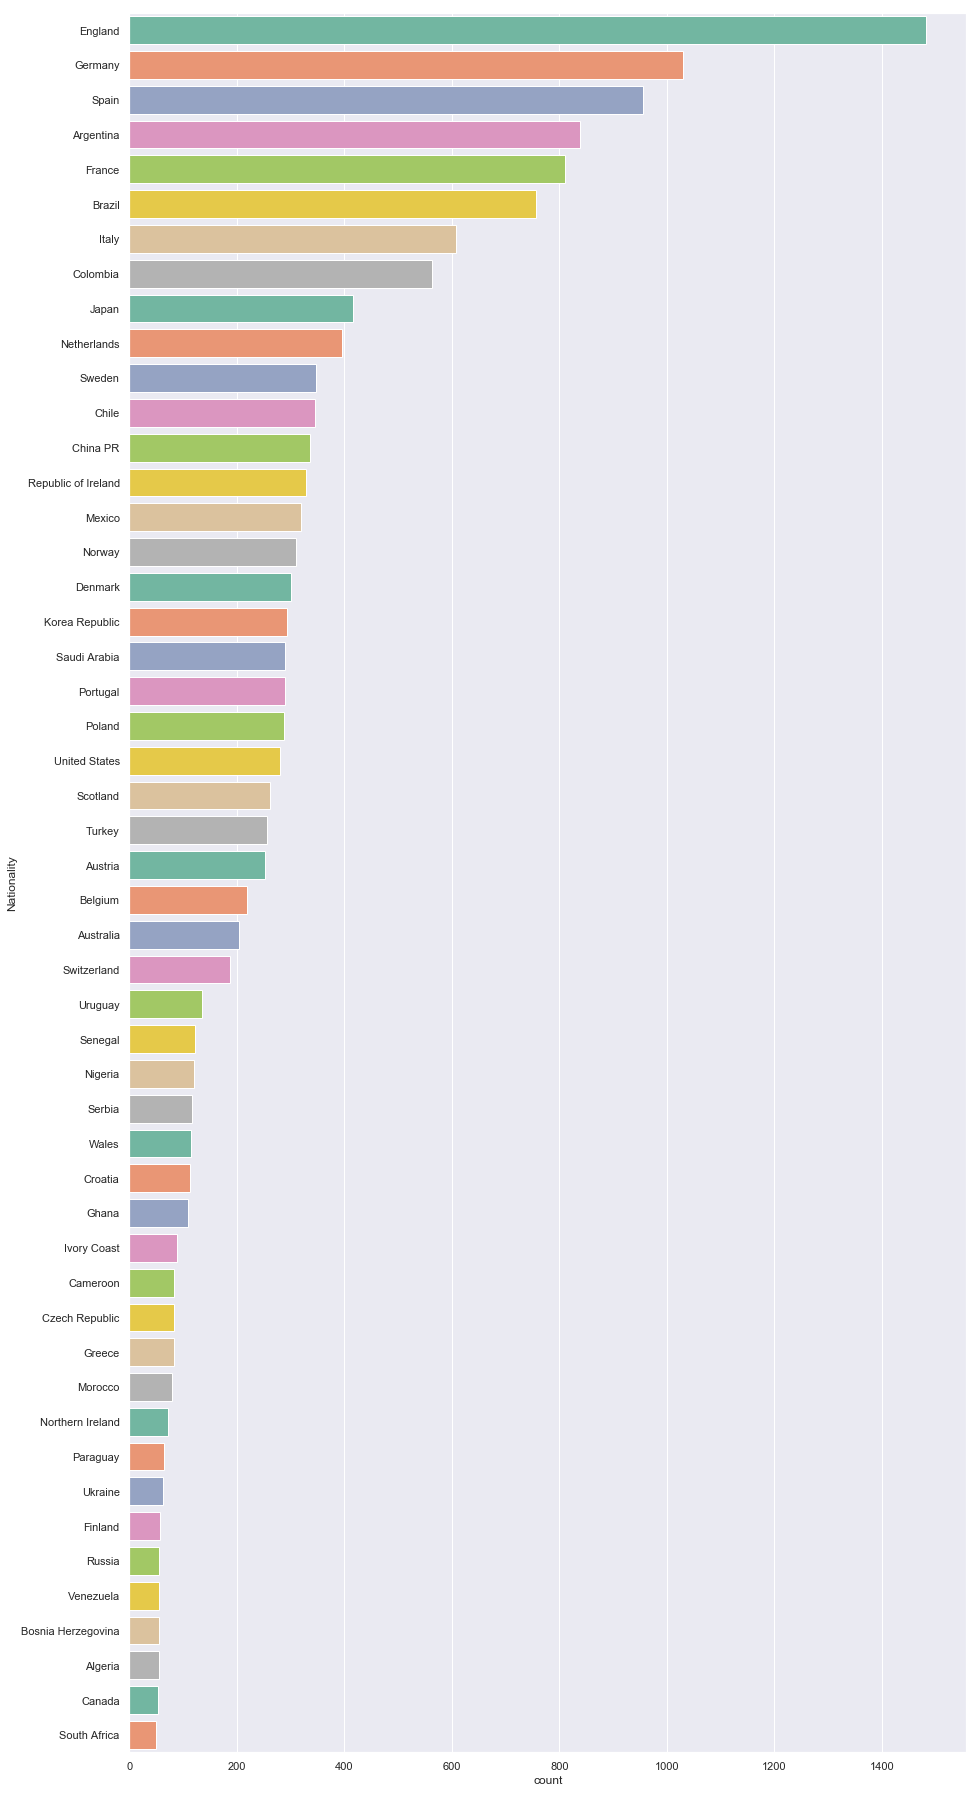

In [10]:
# Visualizing Nationality of players     

plt.figure(figsize=(15,32))
 
sns.countplot(y = data.Nationality,palette="Set2",order=data.Nationality.value_counts().iloc[:50].index)


So we conclude that most of the players are from England, Germany and Spain.

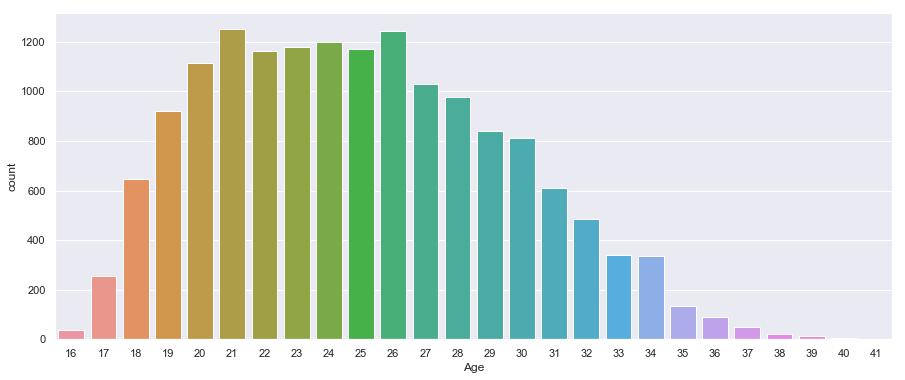

In [11]:
# Visualizing Age coluumn

plt.figure(figsize=(15,6))
sns.countplot(x="Age",data=data)


Majority of players are between the age of 21 and 26.

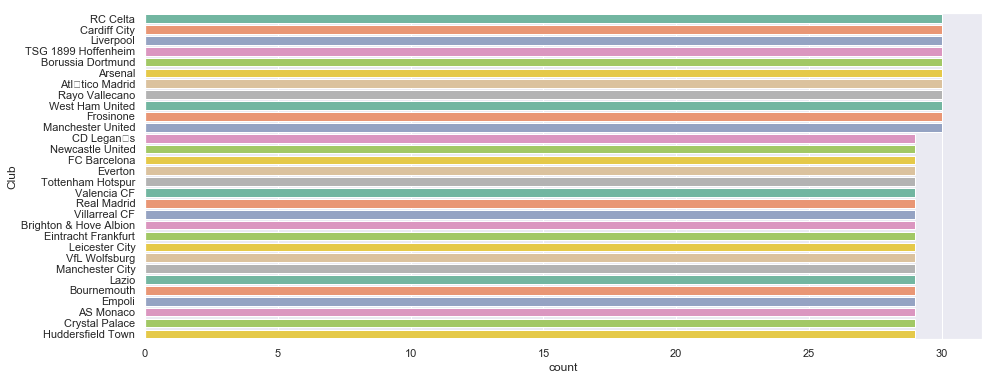

In [12]:
## Visualizing Club of players

plt.figure(figsize=(15,6))
 
sns.countplot(y = data.Club,palette="Set2",order=data.Club.value_counts().iloc[:30].index)


There is almost equal number of players from all club

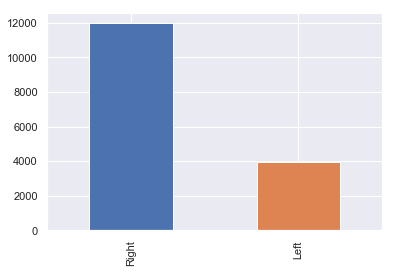

In [13]:
# Visualizing Preferred Foot coluumn

data['Preferred Foot'].value_counts().plot(kind='bar')


Majority of the players prefferred right foot for playing game

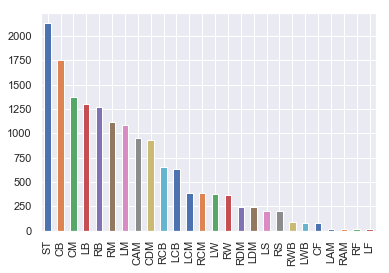

In [14]:
# Visualizing Position coluumn

data['Position'].value_counts().plot(kind='bar')


Majority of the players are Strikers.

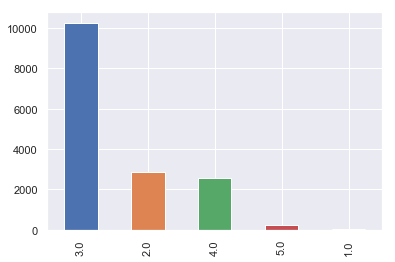

In [15]:
# Visualizing Weak Foot

data['WeakFoot'].value_counts().plot(kind='bar')


# Let us begin our analysis...

Lets find  a goalkeeper first

We will consider two qualities for finding goalkeeper

Shot Stopper: A goalkeeper who is strong in stopping shots taken by opponents.
Sweeper: A goalkeeper who is strong in playing with his feet and making passes

In [16]:
#weights
a = 0.5
b = 1
c= 2
d = 3

Text(0, 0.5, 'Shot Stopping Score')

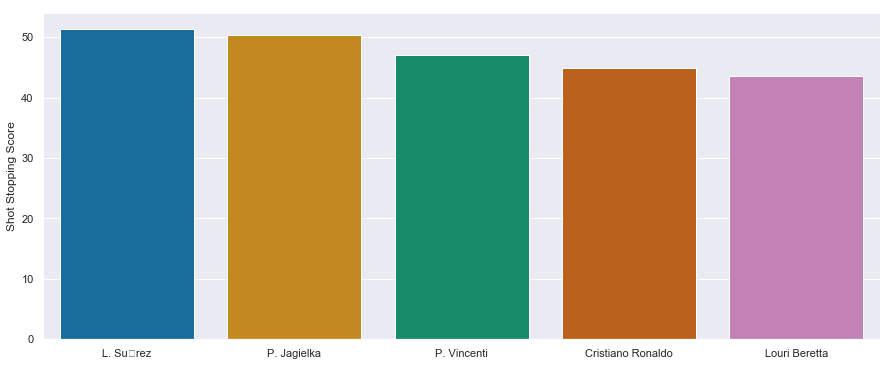

In [17]:
data['gk_Shot_Stopper'] = (b*data.Reactions + b*data.Composure + a*data.SprintSpeed + a*data.Strength 
    + c*data.Jumping + b*data.GKPositioning + c*data.GKDiving + d*data.GKReflexes + b*data.GKHandling)/(2*a + 4*b + 2*c + 1*d)


plt.figure(figsize=(15,6))
show = data.sort_values('gk_Shot_Stopper', ascending=False)[:5]
x = np.array(list(show['Name']))
y = np.array(list(show['gk_Shot_Stopper']))
sns.barplot(x, y, palette= "colorblind")
plt.ylabel("Shot Stopping Score")


Text(0, 0.5, 'Sweeping Score')

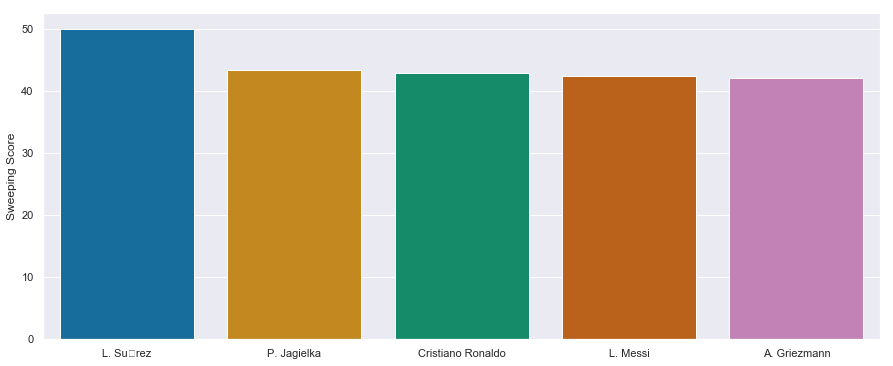

In [18]:
data['gk_Sweeper'] = (b*data.Reactions + b*data.Composure + b*data.SprintSpeed + a*data.ShortPassing 
    + a*data.LongPassing + b*data.Jumping + b*data.GKPositioning + b*data.GKDiving + d*data.GKReflexes 
    + b*data.GKHandling + d*data.GKKicking + c*data.Vision)/(2*a + 4*b + 3*c + 2*d)


plt.figure(figsize=(15,6))
show = data.sort_values('gk_Sweeper', ascending=False)[:5]
x2 = np.array(list(show['Name']))
y2 = np.array(list(show['gk_Sweeper']))
sns.barplot(x2, y2, palette= "colorblind")
plt.ylabel("Sweeping Score")


L. Surez is top in the both the chart so we can conclude that he is a best choice for goalkeeper

Now, lets find 3 defenders with following category 

Centre Backs: We need two center-backs - Lest Center Backs and plays Right Center Back.
Wing Backs: We again need two wing backs. One on the Left and the other on the right.

Text(0, 0.5, 'Left Center Back Score')

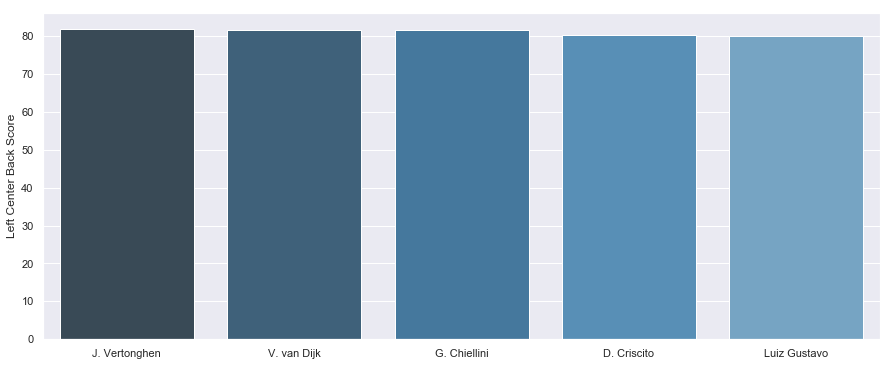

In [19]:
#Left Center Back

data['df_centre_backs'] = ( d*data.Reactions + c*data.Interceptions + d*data.SlidingTackle + d*data.StandingTackle 
                            + b*data.Vision+ b*data.Composure + b*data.Crossing +a*data.ShortPassing + b*data.LongPassing
                            + c*data.Acceleration + b*data.SprintSpeed + d*data.Stamina + d*data.LCB + d*data.Jumping 
                            + d*data.HeadingAccuracy + b*data.LongShots + d*data.Marking + c*data.Aggression)/(6*b + 3*c + 8*d)



plt.figure(figsize=(15,6))
show = data[(data['Position'] == 'LCB')].sort_values('df_centre_backs', ascending=False)[:5]
x = np.array(list(show['Name']))
y = np.array(list(show['df_centre_backs']))
sns.barplot(x, y, palette=sns.color_palette("Blues_d"))
plt.ylabel("Left Center Back Score")

Text(0, 0.5, 'Right Center Back Score')

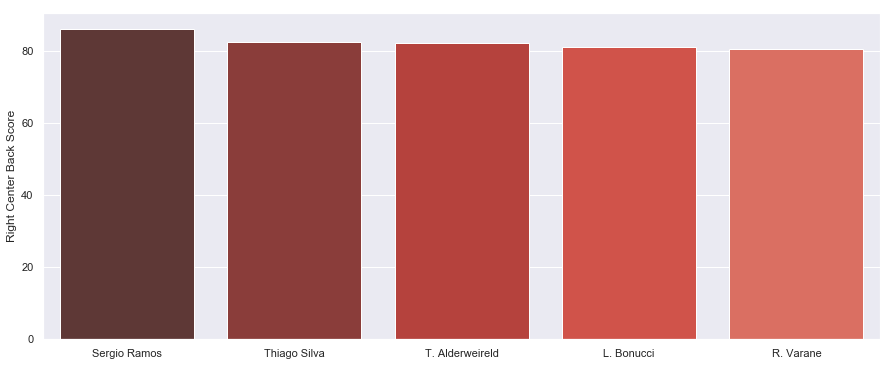

In [20]:
#Right Center Back

data['df_centre_backs'] = ( d*data.Reactions + c*data.Interceptions + d*data.SlidingTackle + d*data.StandingTackle 
                            + b*data.Vision+ b*data.Composure + b*data.Crossing +a*data.ShortPassing + b*data.LongPassing
                            + c*data.Acceleration + b*data.SprintSpeed + d*data.Stamina + d*data.RCB + d*data.Jumping 
                            + d*data.HeadingAccuracy + b*data.LongShots + d*data.Marking + c*data.Aggression)/(6*b + 3*c + 8*d)



plt.figure(figsize=(15,6)) 
show = data[(data['Position'] == 'RCB')].sort_values('df_centre_backs', ascending=False)[:5]
x = np.array(list(show['Name']))
y = np.array(list(show['df_centre_backs']))
sns.barplot(x, y, palette=sns.color_palette("Reds_d"))
plt.ylabel("Right Center Back Score")


Text(0, 0.5, 'Left Back Score')

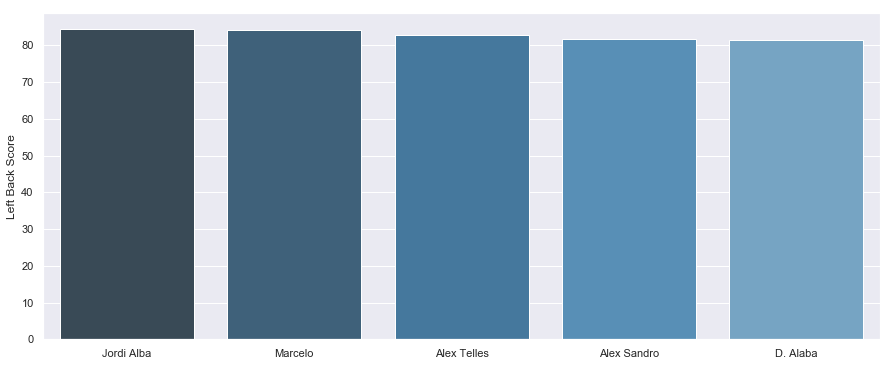

In [21]:
#Left Wing Back
data['df_Wing_Backs'] = (b*data.BallControl + a*data.Dribbling + a*data.Marking + d*data.SlidingTackle + d*data.StandingTackle 
                             + c*data.Vision + c*data.Crossing + b*data.ShortPassing + c*data.LongPassing + d*data.Acceleration 
                                +d*data.SprintSpeed +d*data.LWB +d*data.LB + c*data.Stamina + a*data.Finishing)/(3*a + 2*b + 4*c + 6*d)



plt.figure(figsize=(15,6))
show = data[(data['Position'] == 'LWB') | (data['Position'] == 'LB')].sort_values('df_Wing_Backs', ascending=False)[:5]
x = np.array(list(show['Name']))
y = np.array(list(show['df_Wing_Backs']))
sns.barplot(x, y, palette=sns.color_palette("Blues_d"))
plt.ylabel("Left Back Score")


Text(0, 0.5, 'Right Back Score')

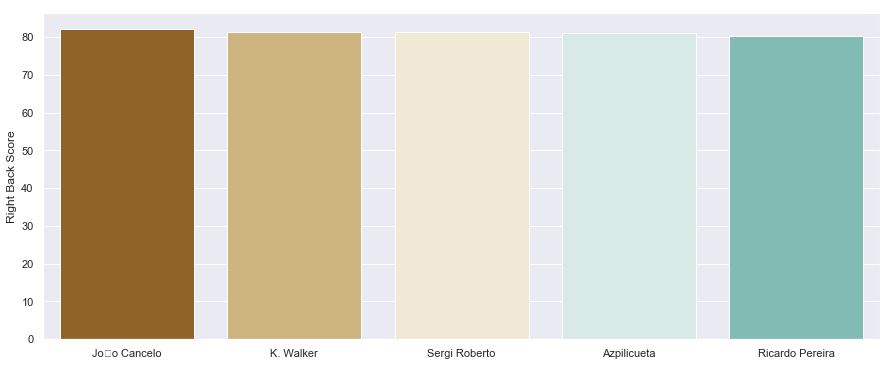

In [22]:
#Right Wing Back
data['df_Wing_Backs'] = (b*data.BallControl + a*data.Dribbling + a*data.Marking + d*data.SlidingTackle + d*data.StandingTackle 
                            + c*data.Vision + c*data.Crossing + b*data.ShortPassing + c*data.LongPassing + d*data.Acceleration 
                            +d*data.SprintSpeed +d*data.RWB +d*data.RB + c*data.Stamina + a*data.Finishing)/(3*a + 2*b + 4*c + 6*d)


plt.figure(figsize=(15,6))
show = data[(data['Position'] == 'RWB') | (data['Position'] == 'RB')].sort_values('df_Wing_Backs', ascending=False)[:5]
x = np.array(list(show['Name']))
y = np.array(list(show['df_Wing_Backs']))
sns.barplot(x, y, palette=sns.color_palette("BrBG"))
plt.ylabel("Right Back Score")

As per above analysis and visualization J.Vertonghen, Sergio Ramos, Jordi Alba and Jolo Cancelo are best defenders

Now, we will find 3 best Mid-filders with following criteria

Playmaker: who will move the ball to the attacking third from defence or midfield.
Beast: who have loads of energy and who can boss the midfield.
Controller: who controls midfield by sitting back or going forward based on dynamic needs.

Text(0, 0.5, 'PlayMaker Score')

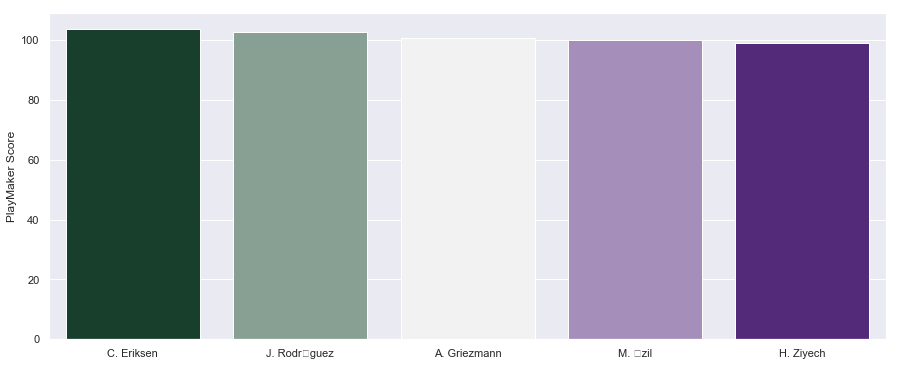

In [23]:
#Midfielding Playmakers
data['mf_playmaker'] = (d*data.BallControl + d*data.Dribbling + a*data.Marking + d*data.Reactions +
    d*data.Vision  + c*data.Crossing + d*data.ShortPassing + d*data.CAM + d*data.LAM + d*data.RAM + 
    c*data.LongPassing + c*data.Curve + b*data.LongShots)/(1*a + 1*b + 2*c + 7*d) 


plt.figure(figsize=(15,6))
show = data[(data['Position'] == 'CAM') | (data['Position'] == 'LAM') | (data['Position'] == 'RAM')].sort_values('mf_playmaker', ascending=False)[:5]
x = np.array(list(show['Name']))
y = np.array(list(show['mf_playmaker']))
sns.barplot(x, y, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("PlayMaker Score")


Text(0, 0.5, 'Beast Score')

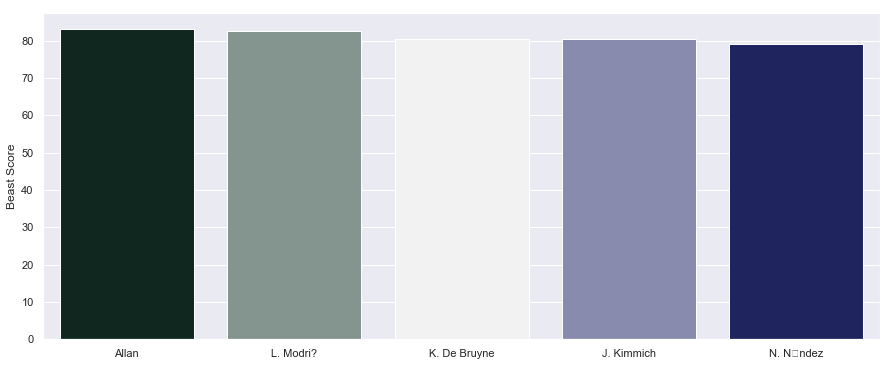

In [24]:
#Midfielding Beast
data['mf_beast'] = (d*data.Agility + c*data.Balance + b*data.Jumping + c*data.Strength + d*data.Stamina +
    a*data.SprintSpeed + c*data.Acceleration + d*data.ShortPassing + c*data.Aggression + d*data.Reactions + b*data.Marking + 
    b*data.StandingTackle + b*data.SlidingTackle + b*data.Interceptions + d*data.RCM + d*data.RM )/(1*a + 5*b + 4*c + 6*d)


plt.figure(figsize=(15,6)) 
show = data[(data['Position'] == 'RCM') | (data['Position'] == 'RM')].sort_values('mf_beast', ascending=False)[:5]
x = np.array(list(show['Name']))
y = np.array(list(show['mf_beast']))
sns.barplot(x, y, palette=sns.diverging_palette(156, 265, s=80, l=15, n=5))
plt.ylabel("Beast Score")


Text(0, 0.5, 'Controller Score')

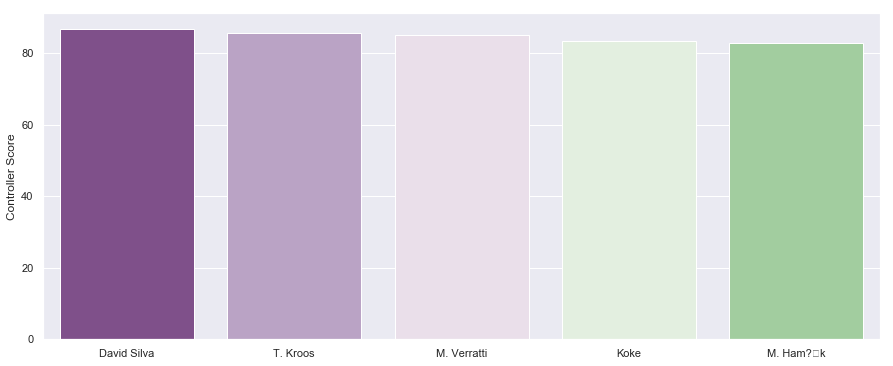

In [25]:

#Midfielding Controller
data['mf_controller'] = (b*data.WeakFoot + d*data.BallControl + a*data.Dribbling + a*data.Marking + d*data.LCM + 
    a*data.Reactions + c*data.Vision + c*data.Composure + d*data.ShortPassing + d*data.LongPassing + d*data.LM)/(2*c + 5*d + 4*a)


plt.figure(figsize=(15,6))
show = data[(data['Position'] == 'LCM') | (data['Position'] == 'LM')].sort_values('mf_controller', ascending=False)[:5]
x = np.array(list(show['Name']))
y = np.array(list(show['mf_controller']))
sns.barplot(x, y, palette=sns.color_palette("PRGn"))
plt.ylabel("Controller Score")


As per above analysis and visualization C.Eriksen, Allan and David Silva are best Mid-filders

Lastly we are going to find 3 best Attackers with following criteria

Attacking Left Wing: who attacking from the left wing.
Attacking Right Wing: who attacking from the right wing.
Striker: who attacking from the center.

Text(0, 0.5, 'Left Wing')

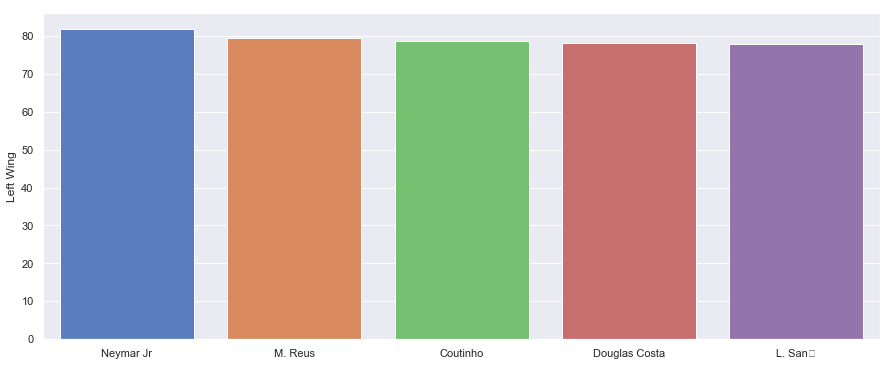

In [26]:
#Attacker Left Wing
data['att_left_wing'] = (c*data.WeakFoot + c*data.BallControl + c*data.Dribbling + c*data.SprintSpeed + d*data.Penalties +
                        d*data.Acceleration + b*data.Vision + c*data.Crossing + b*data.ShortPassing + b*data.LongPassing + 
                         d*data.LS + b*data.Aggression + b*data.Agility + a*data.Curve + c*data.LongShots + d*data.Finishing + 
                         d*data.LM + d*data.LW)/(a + 5*b + 6*c + 6*d)


plt.figure(figsize=(15,6)) 
show = data[(data['Position'] == 'LW') | (data['Position'] == 'LM') | (data['Position'] == 'LS')].sort_values('att_left_wing', ascending=False)[:5]
x = np.array(list(show['Name']))
y = np.array(list(show['att_left_wing']))
sns.barplot(x, y, palette=sns.color_palette("muted"))
plt.ylabel("Left Wing")


Text(0, 0.5, 'Right Wing')

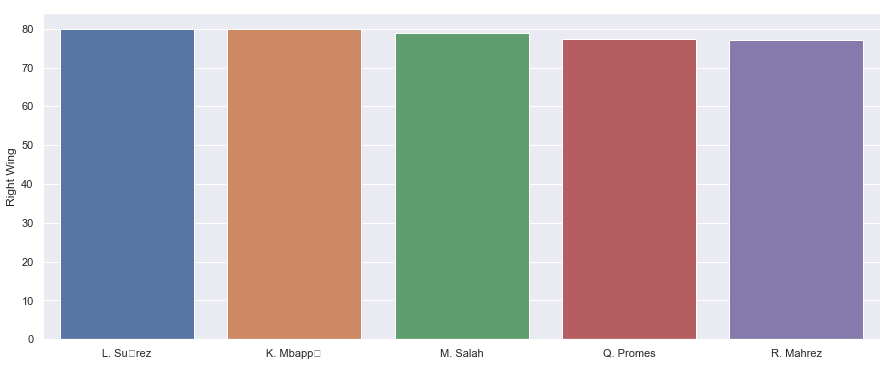

In [27]:

#Attacker Right Wing
data['att_right_wing'] = (c*data.WeakFoot + c*data.BallControl + c*data.Dribbling + c*data.SprintSpeed + d*data.RW + 
                        d*data.Acceleration + b*data.Vision + c*data.Crossing + b*data.ShortPassing + b*data.LongPassing + 
                        d*data.Penalties + b*data.Aggression + b*data.Agility + a*data.Curve + c*data.LongShots + 
                        d*data.Finishing + d*data.RM + d*data.RS)/(a + 5*b + 6*c + 6*d)



plt.figure(figsize=(15,6))
show = data[(data['Position'] == 'RW') | (data['Position'] == 'RM') | (data['Position'] == 'RS')].sort_values('att_right_wing', ascending=False)[:5]
x = np.array(list(show['Name']))
y = np.array(list(show['att_right_wing']))
sns.barplot(x, y, palette=sns.color_palette("deep"))
plt.ylabel("Right Wing")


Text(0, 0.5, 'Striker')

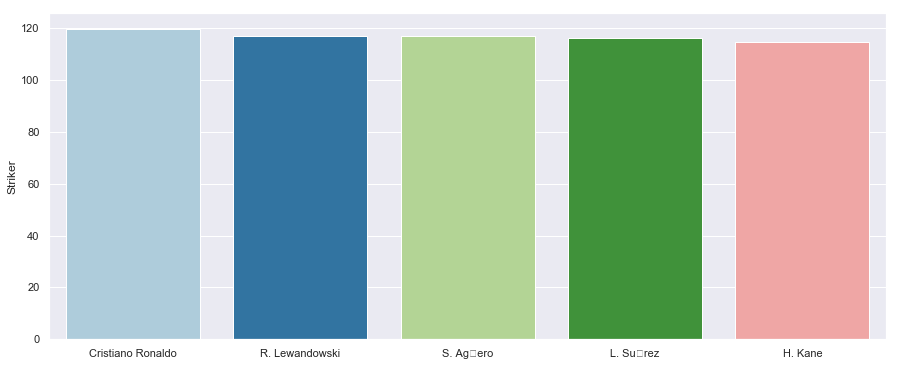

In [28]:
#Attacker Striker
data['att_striker'] = (b*data.WeakFoot + b*data.BallControl + a*data.Vision + b*data.Aggression + d*data.ST + 
    b*data.Agility + a*data.Curve + a*data.LongShots + d*data.Balance + d*data.Finishing + d*data.HeadingAccuracy +
    d*data.Penalties + c*data.Jumping + c*data.Dribbling + d*data.LS + d*data.RS)/(3*a + 4*b + 2*c + 4*d)


plt.figure(figsize=(15,6))
show = data[(data['Position'] == 'ST') | (data['Position'] == 'LS') | (data['Position'] == 'RS') | (data['Position'] == 'CF')].sort_values('att_striker', ascending=False)[:5]
x = np.array(list(show['Name']))
y = np.array(list(show['att_striker']))
sns.barplot(x, y, palette=sns.color_palette("Paired"))
plt.ylabel("Striker")

As per above analysis and visualization Neymar Jr, L Suarez and  Cristiano Ronaldo are best Attackers

# So after all here is the dream 11 team lineup (4-3-3) and goalkeeper

4 defenders:-J.Vertonghen, Sergio Ramos, Jordi Alba and Jolo Cancelo
3 mid-filders:-C.Eriksen, Allan and David Silva
3 Attackers:-Neymar Jr, L Suarez and  Cristiano Ronaldo
goalkeeper:- L. Surez